#### Import libraries into the project

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Using the pandas read_csv() method, read the US Census dataset into the notebook as a DataFrame. Some rows  of data may be required to be filtered

In [31]:
pop_2000 =pd.read_csv('../data/Population/nst-est2010-01.csv')
pop_2000.head(10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,Population Estimates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-Apr-00,NaN
2,NaN,1-Jul-10,1-Jul-09,1-Jul-08,1-Jul-07,1-Jul-06,1-Jul-05,1-Jul-04,1-Jul-03,1-Jul-02,1-Jul-01,1-Jul-00,Estimates Base,Census
3,United States,"309,050,816","306,656,290","304,177,401","301,393,632","298,431,771","295,618,454","292,936,109","290,242,027","287,745,630","285,049,647","282,165,844","281,424,600","281,421,906"
4,Northeast,"55,417,311","55,242,435","55,049,539","54,868,196","54,698,799","54,595,246","54,516,501","54,378,581","54,163,808","53,922,845","53,663,333","53,594,810","53,594,378"
5,Midwest,"66,972,887","66,770,813","66,572,128","66,344,701","66,066,820","65,801,226","65,586,267","65,335,106","65,069,187","64,807,870","64,491,889","64,396,653","64,392,776"
6,South,"114,404,435","113,185,196","111,929,667","110,479,851","108,852,101","107,332,739","105,804,145","104,353,923","103,151,318","101,856,689","100,559,291","100,234,523","100,236,820"
7,West,"72,256,183","71,457,846","70,626,067","69,700,884","68,814,051","67,889,243","67,029,196","66,174,417","65,361,317","64,462,243","63,451,331","63,198,614","63,197,932"
8,.Alabama,"4,729,656","4,707,496","4,673,889","4,634,063","4,594,911","4,542,912","4,510,588","4,489,876","4,471,462","4,463,343","4,451,497","4,447,207","4,447,100"
9,.Alaska,"708,862","694,690","685,532","679,893","675,322","667,114","659,305","647,671","641,974","633,538","627,748","626,933","626,932"


The pop_2000 df requires several clean up items that will be performed
 - Drop existing Headers containing `Unamed:`
 - Drop Rows Header 0, 1 which contains `Nan` 
 - Drop Rows after the Last listed US state of Wyoming
 - Adding a header to Column 0 on to Row Index 2 of `Geographic Area`
 - After Reviewing of the data columns, Column 12 contains `Estimates Base` and Column 13 `Census` which are factored in Column 11 for the `1-Jul-00` population estimates.
 - Drop Column 12 & 13.

In [32]:
##### header = 3 options takes care of dropping the row headers, nrows filters the number of rows being read into the dataframe
#index_col=[0] removes the index. It will be inserted later when we Rename the column[0]
pop_2000 =pd.read_csv('../data/Population/nst-est2010-01.csv',header=3, nrows=56, index_col=[0])
# Rename the Header for first column
pop_2000.reset_index(inplace=True)
pop_2000.rename(columns={'index':'Geographic Area'}, inplace=True)
#Drop column 12 & 13
pop_2000.drop(pop_2000.iloc[:,12:14], axis =1, inplace=True)


pop_2000

,Geographic Area,1-Jul-10,1-Jul-09,1-Jul-08,1-Jul-07,1-Jul-06,1-Jul-05,1-Jul-04,1-Jul-03,1-Jul-02,1-Jul-01,1-Jul-00
0,United States,"309,050,816","306,656,290","304,177,401","301,393,632","298,431,771","295,618,454","292,936,109","290,242,027","287,745,630","285,049,647","282,165,844"
1,Northeast,"55,417,311","55,242,435","55,049,539","54,868,196","54,698,799","54,595,246","54,516,501","54,378,581","54,163,808","53,922,845","53,663,333"
2,Midwest,"66,972,887","66,770,813","66,572,128","66,344,701","66,066,820","65,801,226","65,586,267","65,335,106","65,069,187","64,807,870","64,491,889"
3,South,"114,404,435","113,185,196","111,929,667","110,479,851","108,852,101","107,332,739","105,804,145","104,353,923","103,151,318","101,856,689","100,559,291"
4,West,"72,256,183","71,457,846","70,626,067","69,700,884","68,814,051","67,889,243","67,029,196","66,174,417","65,361,317","64,462,243","63,451,331"
5,.Alabama,"4,729,656","4,707,496","4,673,889","4,634,063","4,594,911","4,542,912","4,510,588","4,489,876","4,471,462","4,463,343","4,451,497"
6,.Alaska,"708,862","694,690","685,532","679,893","675,322","667,114","659,305","647,671","641,974","633,538","627,748"
7,.Arizona,"6,676,627","6,587,653","6,499,207","6,360,238","6,190,987","5,973,970","5,758,692","5,590,820","5,451,472","5,303,869","5,166,304"
8,.Arkansas,"2,910,236","2,887,331","2,867,099","2,841,595","2,814,910","2,776,257","2,746,215","2,722,804","2,704,471","2,690,743","2,678,115"
9,.California,"37,266,600","36,887,615","36,538,008","36,185,908","35,947,461","35,770,688","35,538,256","35,236,589","34,867,773","34,481,753","33,994,383"


In [33]:
pop_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  56 non-null     object
 1   1-Jul-10         56 non-null     object
 2   1-Jul-09         56 non-null     object
 3   1-Jul-08         56 non-null     object
 4   1-Jul-07         56 non-null     object
 5   1-Jul-06         56 non-null     object
 6   1-Jul-05         56 non-null     object
 7   1-Jul-04         56 non-null     object
 8   1-Jul-03         56 non-null     object
 9   1-Jul-02         56 non-null     object
 10  1-Jul-01         56 non-null     object
 11  1-Jul-00         56 non-null     object
dtypes: object(12)
memory usage: 5.4+ KB


In [34]:
pop_2000.rename(columns={'1-Jul-10':'2010',
                         '1-Jul-09':'2009',
                         '1-Jul-08':'2008',
                         '1-Jul-07':'2007',
                         '1-Jul-06':'2006',
                         '1-Jul-05':'2005',
                         '1-Jul-04':'2004',
                         '1-Jul-03':'2003',
                         '1-Jul-02':'2002',
                         '1-Jul-01':'2001',
                         '1-Jul-00':'2000'
                        },inplace=True)
pop_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  56 non-null     object
 1   2010             56 non-null     object
 2   2009             56 non-null     object
 3   2008             56 non-null     object
 4   2007             56 non-null     object
 5   2006             56 non-null     object
 6   2005             56 non-null     object
 7   2004             56 non-null     object
 8   2003             56 non-null     object
 9   2002             56 non-null     object
 10  2001             56 non-null     object
 11  2000             56 non-null     object
dtypes: object(12)
memory usage: 5.4+ KB


In [35]:
pop_2000.head()

,Geographic Area,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,United States,"309,050,816","306,656,290","304,177,401","301,393,632","298,431,771","295,618,454","292,936,109","290,242,027","287,745,630","285,049,647","282,165,844"
1,Northeast,"55,417,311","55,242,435","55,049,539","54,868,196","54,698,799","54,595,246","54,516,501","54,378,581","54,163,808","53,922,845","53,663,333"
2,Midwest,"66,972,887","66,770,813","66,572,128","66,344,701","66,066,820","65,801,226","65,586,267","65,335,106","65,069,187","64,807,870","64,491,889"
3,South,"114,404,435","113,185,196","111,929,667","110,479,851","108,852,101","107,332,739","105,804,145","104,353,923","103,151,318","101,856,689","100,559,291"
4,West,"72,256,183","71,457,846","70,626,067","69,700,884","68,814,051","67,889,243","67,029,196","66,174,417","65,361,317","64,462,243","63,451,331"


In [36]:
#Change the data type to Integers instead of objects
pop_years = ['2010','2009','2008','2007',
            '2006','2005','2004','2003',
            '2002','2001','2000']
#We go into the dataframe for the above years and drop the , so we can coerse it for int data type
for year in pop_years:
    pop_2000[year]= pop_2000[year].str.replace(',','',regex=False)

# Below line changes all the population data in year columsn to integers
pop_2000[pop_years]=pop_2000[pop_years].apply(pd.to_numeric, errors='coerce', axis=1)

pop_2000.head()

,Geographic Area,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,United States,309050816,306656290,304177401,301393632,298431771,295618454,292936109,290242027,287745630,285049647,282165844
1,Northeast,55417311,55242435,55049539,54868196,54698799,54595246,54516501,54378581,54163808,53922845,53663333
2,Midwest,66972887,66770813,66572128,66344701,66066820,65801226,65586267,65335106,65069187,64807870,64491889
3,South,114404435,113185196,111929667,110479851,108852101,107332739,105804145,104353923,103151318,101856689,100559291
4,West,72256183,71457846,70626067,69700884,68814051,67889243,67029196,66174417,65361317,64462243,63451331


In [37]:
pop_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  56 non-null     object
 1   2010             56 non-null     int64 
 2   2009             56 non-null     int64 
 3   2008             56 non-null     int64 
 4   2007             56 non-null     int64 
 5   2006             56 non-null     int64 
 6   2005             56 non-null     int64 
 7   2004             56 non-null     int64 
 8   2003             56 non-null     int64 
 9   2002             56 non-null     int64 
 10  2001             56 non-null     int64 
 11  2000             56 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 5.4+ KB


In [38]:
# Strip the . in the name of the State
#in the future add the regex statement
pop_2000['Geographic Area']=pop_2000['Geographic Area'].str.replace('.','',regex=False)
pop_2000

,Geographic Area,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,United States,309050816,306656290,304177401,301393632,298431771,295618454,292936109,290242027,287745630,285049647,282165844
1,Northeast,55417311,55242435,55049539,54868196,54698799,54595246,54516501,54378581,54163808,53922845,53663333
2,Midwest,66972887,66770813,66572128,66344701,66066820,65801226,65586267,65335106,65069187,64807870,64491889
3,South,114404435,113185196,111929667,110479851,108852101,107332739,105804145,104353923,103151318,101856689,100559291
4,West,72256183,71457846,70626067,69700884,68814051,67889243,67029196,66174417,65361317,64462243,63451331
5,Alabama,4729656,4707496,4673889,4634063,4594911,4542912,4510588,4489876,4471462,4463343,4451497
6,Alaska,708862,694690,685532,679893,675322,667114,659305,647671,641974,633538,627748
7,Arizona,6676627,6587653,6499207,6360238,6190987,5973970,5758692,5590820,5451472,5303869,5166304
8,Arkansas,2910236,2887331,2867099,2841595,2814910,2776257,2746215,2722804,2704471,2690743,2678115
9,California,37266600,36887615,36538008,36185908,35947461,35770688,35538256,35236589,34867773,34481753,33994383


#### Save the file as CSV

In [39]:
pop_2000.to_csv(r'../clean_data_source/pop_2000_2010.csv', index = False)

#### Using the pandas read_csv() method, read the US Census dataset from 2010- 2020 into the notebook as a DataFrame. Some rows  of data may be required to be filtered

In [40]:
##### header = 3 options takes care of dropping the row headers, nrows filters the number of rows being read into the dataframe
#index_col=[0] removes the index. It will be inserted later when we Rename the column[0]
pop_2020 =pd.read_csv('../data/Population/nst-est2019-01.csv', nrows=56)
pop_2020.info()
pop_2020 = pop_2020[['NAME','POPESTIMATE2010','POPESTIMATE2011',
                     'POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014',
                    'POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017',
                    'POPESTIMATE2018','POPESTIMATE2019']]
pop_2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SUMLEV             56 non-null     int64  
 1   REGION             56 non-null     int64  
 2   DIVISION           56 non-null     int64  
 3   STATE              56 non-null     int64  
 4   NAME               56 non-null     object 
 5   ESTIMATESBASE2010  56 non-null     int64  
 6   POPESTIMATE2010    56 non-null     int64  
 7   POPESTIMATE2011    56 non-null     int64  
 8   POPESTIMATE2012    56 non-null     int64  
 9   POPESTIMATE2013    56 non-null     int64  
 10  POPESTIMATE2014    56 non-null     int64  
 11  POPESTIMATE2015    56 non-null     int64  
 12  POPESTIMATE2016    56 non-null     int64  
 13  POPESTIMATE2017    56 non-null     int64  
 14  POPESTIMATE2018    56 non-null     int64  
 15  POPESTIMATE2019    56 non-null     int64  
 16  NPOPCHG_2010       56 non-nu

,NAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
6,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
7,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
8,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


In [41]:
# Select the relative columns required for the purposes of this project
pop_2020.columns = ['Geographic Area','2010','2011','2012',
                              '2013','2014','2015','2016','2017',
                              '2018','2019']
pop_2020

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
6,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
7,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
8,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


#### Save the file as CSV

In [42]:
pop_2020.to_csv(r'../clean_data_source/pop_2010_2019.csv', index = False)

Merge the final Population across all 20 years

In [43]:
pop_2000A = pop_2000[pop_2000.columns[::-1]]
pop_2000B = pop_2000A.drop(['2010'],axis=1)
# shift column 'Geographic Area' to first position
first_column = pop_2000B.pop('Geographic Area')
  
# insert column using insert(position,column_name,first_column) function
pop_2000B.insert(0, 'Geographic Area', first_column)

#Finally Merge the entire population data set
population = pd.merge(pop_2000B, pop_2020, how='left', on='Geographic Area')
# Save the File Externally
population.to_csv(r'../clean_data_source/merged_population.csv', index = False)
population

,Geographic Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,282165844,285049647,287745630,290242027,292936109,295618454,298431771,301393632,304177401,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,53663333,53922845,54163808,54378581,54516501,54595246,54698799,54868196,55049539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Midwest,64491889,64807870,65069187,65335106,65586267,65801226,66066820,66344701,66572128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South,100559291,101856689,103151318,104353923,105804145,107332739,108852101,110479851,111929667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,West,63451331,64462243,65361317,66174417,67029196,67889243,68814051,69700884,70626067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alabama,4451497,4463343,4471462,4489876,4510588,4542912,4594911,4634063,4673889,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,Alaska,627748,633538,641974,647671,659305,667114,675322,679893,685532,...,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,Arizona,5166304,5303869,5451472,5590820,5758692,5973970,6190987,6360238,6499207,...,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,Arkansas,2678115,2690743,2704471,2722804,2746215,2776257,2814910,2841595,2867099,...,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,California,33994383,34481753,34867773,35236589,35538256,35770688,35947461,36185908,36538008,...,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


### Read in the Insurance Coverage Population

#### Import Uninsured information by State

In [44]:
unins_df1 = pd.read_excel('..\data\Insurance\Insurance 2009 to 2019.xlsx',skiprows = 2, sheet_name = 1)
#skiprows = 1,,header=[0, 1], ,
unins_df1.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
unins_df1.head()

,Geographic Area,Uninsured_2019,Uninsured_2018,Uninsured_2017,Uninsured_2016,Uninsured_2015,Uninsured_2014,Uninsured_2013,Uninsured_2012,Uninsured_2011,Uninsured_2010,Uninsured_2009,Uninsured_2008
0,United States,29639000.0,28566000.0,28019000.0,27304000.0,29758000.0,36670000.0,45181000.0,45615000.0,46376000.0,47208000.0,45665000.0,43503000.0
1,Alabama,469000.0,481000.0,449000.0,435000.0,484000.0,579000.0,645000.0,632000.0,674000.0,687000.0,637000.0,609000.0
2,Arizona,809000.0,750000.0,695000.0,681000.0,728000.0,903000.0,1118000.0,1131000.0,1095000.0,1065000.0,1127000.0,1154000.0
3,Arkansas,271000.0,244000.0,232000.0,232000.0,278000.0,343000.0,465000.0,476000.0,492000.0,501000.0,483000.0,480000.0
4,California,3002000.0,2826000.0,2797000.0,2844000.0,3317000.0,4767000.0,6500000.0,6710000.0,6726000.0,6825000.0,6559000.0,6239000.0


In [45]:
unins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  52 non-null     object 
 1   Uninsured_2019   51 non-null     float64
 2   Uninsured_2018   51 non-null     float64
 3   Uninsured_2017   51 non-null     float64
 4   Uninsured_2016   51 non-null     float64
 5   Uninsured_2015   51 non-null     float64
 6   Uninsured_2014   51 non-null     float64
 7   Uninsured_2013   51 non-null     float64
 8   Uninsured_2012   51 non-null     float64
 9   Uninsured_2011   51 non-null     float64
 10  Uninsured_2010   51 non-null     float64
 11  Uninsured_2009   51 non-null     float64
 12  Uninsured_2008   51 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.4+ KB


#### Import Privately insured information by State

In [46]:
private_ins_df1 = pd.read_excel('..\data\Insurance\Insurance 2009 to 2019.xlsx',skiprows = 2, sheet_name = 2)
#private_ins_df1.head()
private_ins_df1.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
private_ins_df1

,Geographic Area,Private_2019,Private_2018,Private_2017,Private_2016,Private_2015,Private_2014,Private_2013,Private_2012,Private_2011,Private_2010,Private_2009,Private_2008
0,United States,217812000.0,217623000.0,216952000.0,215859000.0,213514000.0,208333000.0,202391000.0,201213000.0,199871000.0,200269000.0,203300000.0,207786000.0
1,Alabama,3228000.0,3202000.0,3205000.0,3249000.0,3198000.0,3132000.0,3080000.0,3088000.0,3061000.0,3075000.0,3097000.0,3170000.0
2,Arizona,4490000.0,4421000.0,4352000.0,4246000.0,4222000.0,4050000.0,3904000.0,3822000.0,3771000.0,3811000.0,3975000.0,4036000.0
3,Arkansas,1757000.0,1787000.0,1807000.0,1820000.0,1793000.0,1761000.0,1689000.0,1699000.0,1688000.0,1686000.0,1697000.0,1697000.0
4,California,24913000.0,24897000.0,24824000.0,24428000.0,24138000.0,23665000.0,22694000.0,22507000.0,22363000.0,22327000.0,22774000.0,23361000.0
5,Colorado,4016000.0,3964000.0,3862000.0,3823000.0,3778000.0,3672000.0,3567000.0,3499000.0,3489000.0,3458000.0,3516000.0,3517000.0
6,Connecticut,2440000.0,2502000.0,2524000.0,2536000.0,2545000.0,2522000.0,2504000.0,2543000.0,2574000.0,2606000.0,2633000.0,2697000.0
7,Delaware,678000.0,673000.0,697000.0,670000.0,664000.0,655000.0,637000.0,636000.0,628000.0,627000.0,630000.0,641000.0
8,District of Columbia,506000.0,488000.0,479000.0,459000.0,466000.0,440000.0,438000.0,432000.0,430000.0,415000.0,400000.0,406000.0
9,Florida,13216000.0,13070000.0,12835000.0,12663000.0,12337000.0,11562000.0,10935000.0,10872000.0,10810000.0,10888000.0,11065000.0,11476000.0


In [47]:
private_ins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  52 non-null     object 
 1   Private_2019     51 non-null     float64
 2   Private_2018     51 non-null     float64
 3   Private_2017     51 non-null     float64
 4   Private_2016     51 non-null     float64
 5   Private_2015     51 non-null     float64
 6   Private_2014     51 non-null     float64
 7   Private_2013     51 non-null     float64
 8   Private_2012     51 non-null     float64
 9   Private_2011     51 non-null     float64
 10  Private_2010     51 non-null     float64
 11  Private_2009     51 non-null     float64
 12  Private_2008     51 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.4+ KB


#### Import Public insured information by State

In [48]:
public_ins_df1 = pd.read_excel('..\data\Insurance\Insurance 2009 to 2019.xlsx',skiprows = 2, sheet_name = 3)
public_ins_df1.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
public_ins_df1.head()

,Geographic Area,Public_2019,Public_2018,Public_2017,Public_2016,Public_2015,Public_2014,Public_2013,Public_2012,Public_2011,Public_2010,Public_2009,Public_2008
0,United States,114315000.0,114750000.0,113720000.0,112688000.0,109874000.0,104228000.0,98173000.0,96136000.0,93418000.0,90375000.0,85956000.0,81431000.0
1,Alabama,1797000.0,1790000.0,1812000.0,1762000.0,1752000.0,1694000.0,1655000.0,1642000.0,1562000.0,1528000.0,1466000.0,1401000.0
2,Arizona,2750000.0,2776000.0,2705000.0,2711000.0,2586000.0,2427000.0,2242000.0,2199000.0,2221000.0,2158000.0,2121000.0,1963000.0
3,Arkansas,1303000.0,1307000.0,1309000.0,1269000.0,1231000.0,1171000.0,1101000.0,1055000.0,1056000.0,1031000.0,1006000.0,985000.0
4,California,14749000.0,14995000.0,14992000.0,15077000.0,14671000.0,13123000.0,11802000.0,11427000.0,11077000.0,10701000.0,10083000.0,9746000.0


In [49]:
public_ins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  52 non-null     object 
 1   Public_2019      51 non-null     float64
 2   Public_2018      51 non-null     float64
 3   Public_2017      51 non-null     float64
 4   Public_2016      51 non-null     float64
 5   Public_2015      51 non-null     float64
 6   Public_2014      51 non-null     float64
 7   Public_2013      51 non-null     float64
 8   Public_2012      51 non-null     float64
 9   Public_2011      51 non-null     float64
 10  Public_2010      51 non-null     float64
 11  Public_2009      51 non-null     float64
 12  Public_2008      51 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.4+ KB


In [50]:
#Select only the necessary rows & columns to review data

usa_uninsured = unins_df1.iloc[[0],:]
usa_uninsured


,Geographic Area,Uninsured_2019,Uninsured_2018,Uninsured_2017,Uninsured_2016,Uninsured_2015,Uninsured_2014,Uninsured_2013,Uninsured_2012,Uninsured_2011,Uninsured_2010,Uninsured_2009,Uninsured_2008
0,United States,29639000.0,28566000.0,28019000.0,27304000.0,29758000.0,36670000.0,45181000.0,45615000.0,46376000.0,47208000.0,45665000.0,43503000.0


In [51]:
# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
usa_uninsured2 = pd.melt(usa_uninsured, 
                         id_vars='Geographic Area',
                        value_name='Uninsured',
                        var_name='Year')
usa_uninsured2


,Geographic Area,Year,Uninsured
0,United States,Uninsured_2019,29639000.0
1,United States,Uninsured_2018,28566000.0
2,United States,Uninsured_2017,28019000.0
3,United States,Uninsured_2016,27304000.0
4,United States,Uninsured_2015,29758000.0
5,United States,Uninsured_2014,36670000.0
6,United States,Uninsured_2013,45181000.0
7,United States,Uninsured_2012,45615000.0
8,United States,Uninsured_2011,46376000.0
9,United States,Uninsured_2010,47208000.0


Text(0.5, 1.0, 'Uninsured Population')

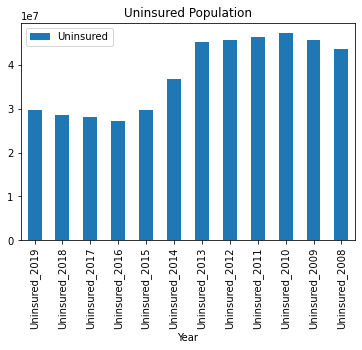

In [52]:
usa_uninsured2.plot.bar('Year','Uninsured')
plt.title('Uninsured Population')

In [53]:
# Graph by starting from 2008, therefore reverse the dataframe
usa_uninsured3 =usa_uninsured2.iloc[::-1]
usa_uninsured3

,Geographic Area,Year,Uninsured
11,United States,Uninsured_2008,43503000.0
10,United States,Uninsured_2009,45665000.0
9,United States,Uninsured_2010,47208000.0
8,United States,Uninsured_2011,46376000.0
7,United States,Uninsured_2012,45615000.0
6,United States,Uninsured_2013,45181000.0
5,United States,Uninsured_2014,36670000.0
4,United States,Uninsured_2015,29758000.0
3,United States,Uninsured_2016,27304000.0
2,United States,Uninsured_2017,28019000.0


Text(0.5, 1.0, 'Uninsured Population')

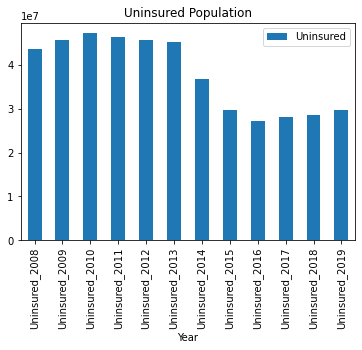

In [54]:
usa_uninsured3.plot.bar('Year','Uninsured')
plt.title('Uninsured Population')

In [55]:
# Merge the Population data for USA so that a average line plot can be added to the Graphical Presentation

# filter the population to the National level
pop_df = pop_2020.iloc[[0],:]

pop_df2 =  pd.melt(pop_df, 
                   id_vars='Geographic Area',
                   value_name='Population',
                    var_name='Year')
pop_df2['Year'] = pop_df2['Year'].str.replace('pop_','',regex=False)
pop_df2

,Geographic Area,Year,Population
0,United States,2010,309321666
1,United States,2011,311556874
2,United States,2012,313830990
3,United States,2013,315993715
4,United States,2014,318301008
5,United States,2015,320635163
6,United States,2016,322941311
7,United States,2017,324985539
8,United States,2018,326687501
9,United States,2019,328239523


In [56]:
pop_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  10 non-null     object
 1   Year             10 non-null     object
 2   Population       10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [57]:
usa_uninsured4 = usa_uninsured3
# Strip the Uninsured to get the appropriate Year
usa_uninsured4['Year']=usa_uninsured4['Year'].str.replace('Uninsured_','',regex=False)
usa_uninsured4


,Geographic Area,Year,Uninsured
11,United States,2008,43503000.0
10,United States,2009,45665000.0
9,United States,2010,47208000.0
8,United States,2011,46376000.0
7,United States,2012,45615000.0
6,United States,2013,45181000.0
5,United States,2014,36670000.0
4,United States,2015,29758000.0
3,United States,2016,27304000.0
2,United States,2017,28019000.0


In [58]:
usa_uninsured4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 11 to 0
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  12 non-null     object 
 1   Year             12 non-null     object 
 2   Uninsured        12 non-null     float64
dtypes: float64(1), object(2)
memory usage: 420.0+ bytes


In [59]:
pop_df2 = pop_df2[['Year','Population']]
pop_df2
usa_uninsured5 = pd.merge(usa_uninsured4, pop_df2, how='left', on ='Year' )
usa_uninsured5

,Geographic Area,Year,Uninsured,Population
0,United States,2008,43503000.0,NaN
1,United States,2009,45665000.0,NaN
2,United States,2010,47208000.0,309321666.0
3,United States,2011,46376000.0,311556874.0
4,United States,2012,45615000.0,313830990.0
5,United States,2013,45181000.0,315993715.0
6,United States,2014,36670000.0,318301008.0
7,United States,2015,29758000.0,320635163.0
8,United States,2016,27304000.0,322941311.0
9,United States,2017,28019000.0,324985539.0


In [60]:
usa_uninsured5['uninsured_rate'] = round((usa_uninsured5['Uninsured']/usa_uninsured5['Population'])*100 ,2)
usa_uninsured5

,Geographic Area,Year,Uninsured,Population,uninsured_rate
0,United States,2008,43503000.0,NaN,NaN
1,United States,2009,45665000.0,NaN,NaN
2,United States,2010,47208000.0,309321666.0,15.26
3,United States,2011,46376000.0,311556874.0,14.89
4,United States,2012,45615000.0,313830990.0,14.53
5,United States,2013,45181000.0,315993715.0,14.30
6,United States,2014,36670000.0,318301008.0,11.52
7,United States,2015,29758000.0,320635163.0,9.28
8,United States,2016,27304000.0,322941311.0,8.45
9,United States,2017,28019000.0,324985539.0,8.62


Text(0.5, 1.0, 'Uninsured Population')

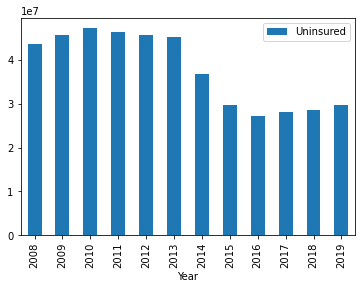

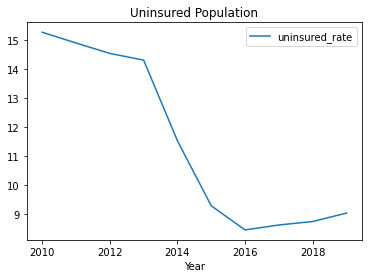

In [61]:
usa_uninsured5.plot.bar('Year','Uninsured')
usa_uninsured5.plot.line('Year','uninsured_rate')
plt.title('Uninsured Population')

#### How many people are uninsured?
After several years of coverage gains following the implementation of the ACA, the uninsured rate increased from 2017 to 2019 amid efforts to alter the availability and affordability of coverage

#### Merge the Uninsure Population and the Rate of Uninsured on one graph

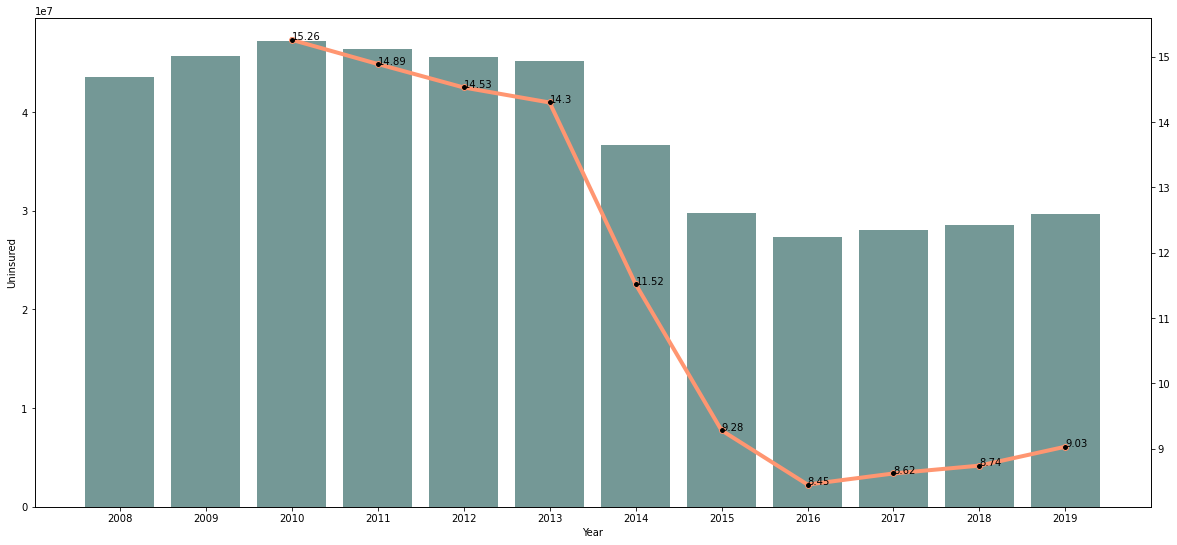

In [62]:
fig, ax1 = plt.subplots(figsize = (20,9))

ax1 = sns.barplot(x = "Year", 
                  y = "Uninsured", 
                  data = usa_uninsured5, 
                  color = '#0e5d59',
                  alpha = 0.6,
                  saturation = 0.75,
                  estimator = sum, 
                  ci = None, 
                  ax=ax1)

ax2 = ax1.twinx()

ax2.plot(ax1.get_xticks(), 
         usa_uninsured5['uninsured_rate'],
         color = '#ff9671',
         marker="o",
         markerfacecolor='black',
         linewidth = 4)

for i,j in usa_uninsured5.uninsured_rate.items():
    ax2.annotate(str(j), xy=(i, j))


#### Key Details:

When the major ACA coverage provisions went into effect in 2014, the number of uninsured and uninsured rate dropped dramatically and continued to fall through 2016 when just under 27 million people (10.0% of the nonelderly population) lacked coverage

The uninsured rate increased in 2019, continuing a steady upward climb that began in 2017. The uninsured rate in 2019 ticked up to 10.9% from 10.4% in 2018 and 10.0% in 2016, and the number of people who were uninsured in 2019 grew by more than one million from 2018 and by 2.2 million from 2016 (Figure 1). Despite these increases, the uninsured rate in 2019 remained significantly below pre-ACA levels.

In [63]:
unins_df2 = pd.read_excel('..\data\Insurance\Insurance 1999 to 2009.xls',skiprows = 1, sheet_name = 2)
#skiprows = 1,,header=[0, 1], ,
unins_df2.rename(columns={'Unnamed: 0':'Geographic Area'}, inplace=True)
unins_df2.head()

,Geographic Area,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States:,50674000,46340000,45657000,46995000,44815000,43498000,43404000,42019000,39760000,38426000,38767000
1,Alabama:,789000,561000,549000,689000,657000,562000,586000,539000,548000,557000,571000
2,Alaska:,122000,133000,123000,109000,113000,107000,121000,117000,98000,114000,116000
3,Arizona:,1273000,1273000,1164000,1311000,1183000,961000,929000,887000,933000,834000,996000
4,Arkansas:,548000,505000,451000,521000,482000,441000,457000,431000,419000,367000,357000


In [64]:
list(unins_df2.columns.values)

['Geographic Area',
 2009,
 2008,
 2007,
 2006,
 2005,
 '2004',
 2003,
 2002,
 2001,
 '2000',
 '1999']

In [65]:
unins_df1.head()

,Geographic Area,Uninsured_2019,Uninsured_2018,Uninsured_2017,Uninsured_2016,Uninsured_2015,Uninsured_2014,Uninsured_2013,Uninsured_2012,Uninsured_2011,Uninsured_2010,Uninsured_2009,Uninsured_2008
0,United States,29639000.0,28566000.0,28019000.0,27304000.0,29758000.0,36670000.0,45181000.0,45615000.0,46376000.0,47208000.0,45665000.0,43503000.0
1,Alabama,469000.0,481000.0,449000.0,435000.0,484000.0,579000.0,645000.0,632000.0,674000.0,687000.0,637000.0,609000.0
2,Arizona,809000.0,750000.0,695000.0,681000.0,728000.0,903000.0,1118000.0,1131000.0,1095000.0,1065000.0,1127000.0,1154000.0
3,Arkansas,271000.0,244000.0,232000.0,232000.0,278000.0,343000.0,465000.0,476000.0,492000.0,501000.0,483000.0,480000.0
4,California,3002000.0,2826000.0,2797000.0,2844000.0,3317000.0,4767000.0,6500000.0,6710000.0,6726000.0,6825000.0,6559000.0,6239000.0


In [66]:
unins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  52 non-null     object 
 1   Uninsured_2019   51 non-null     float64
 2   Uninsured_2018   51 non-null     float64
 3   Uninsured_2017   51 non-null     float64
 4   Uninsured_2016   51 non-null     float64
 5   Uninsured_2015   51 non-null     float64
 6   Uninsured_2014   51 non-null     float64
 7   Uninsured_2013   51 non-null     float64
 8   Uninsured_2012   51 non-null     float64
 9   Uninsured_2011   51 non-null     float64
 10  Uninsured_2010   51 non-null     float64
 11  Uninsured_2009   51 non-null     float64
 12  Uninsured_2008   51 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.4+ KB


Based on the above to dataframes, we will drop year 2009 and 2008 from  unins_df2 where the data is continuing back to 1999 as it is the oldest file

In [67]:
unins_df3 = unins_df2.drop([2009,2008],axis=1)
unins_df3.head()
#We go into the dataframe for Geographic Area and drop the ':' so we can prepare it for merge
for state in 'Geographic Area':
    unins_df3['Geographic Area']= unins_df3['Geographic Area'].str.replace(':','',regex=False)

unins_df3.head()


,Geographic Area,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States,45657000,46995000,44815000,43498000,43404000,42019000,39760000,38426000,38767000
1,Alabama,549000,689000,657000,562000,586000,539000,548000,557000,571000
2,Alaska,123000,109000,113000,107000,121000,117000,98000,114000,116000
3,Arizona,1164000,1311000,1183000,961000,929000,887000,933000,834000,996000
4,Arkansas,451000,521000,482000,441000,457000,431000,419000,367000,357000


In [68]:


uninsured_pop= pd.merge(unins_df1, unins_df3, how='inner', on ='Geographic Area')
#uninsured_pop.rename(columns=lambda x: x.replace('Uninsured_', ''), inplace=True)
uninsured_pop.rename(columns={
                         'Uninsured_2019':'2019',
                         'Uninsured_2018':'2018',
                         'Uninsured_2017':'2017',
                         'Uninsured_2016':'2016',
                         'Uninsured_2015':'2015',
                         'Uninsured_2014':'2014',
                         'Uninsured_2013':'2013',
                         'Uninsured_2012':'2012',
                         'Uninsured_2011':'2011',
                         'Uninsured_2010':'2010',
                         'Uninsured_2009':'2009',
                         'Uninsured_2008':'2008',
                        },inplace=True)




uninsured_pop.to_csv(r'../clean_data_source/uninsured_pop.csv', index = False)
uninsured_pop.head()

,Geographic Area,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States,29639000.0,28566000.0,28019000.0,27304000.0,29758000.0,36670000.0,45181000.0,45615000.0,46376000.0,...,43503000.0,45657000,46995000,44815000,43498000,43404000,42019000,39760000,38426000,38767000
1,Alabama,469000.0,481000.0,449000.0,435000.0,484000.0,579000.0,645000.0,632000.0,674000.0,...,609000.0,549000,689000,657000,562000,586000,539000,548000,557000,571000
2,Arizona,809000.0,750000.0,695000.0,681000.0,728000.0,903000.0,1118000.0,1131000.0,1095000.0,...,1154000.0,1164000,1311000,1183000,961000,929000,887000,933000,834000,996000
3,Arkansas,271000.0,244000.0,232000.0,232000.0,278000.0,343000.0,465000.0,476000.0,492000.0,...,480000.0,451000,521000,482000,441000,457000,431000,419000,367000,357000
4,California,3002000.0,2826000.0,2797000.0,2844000.0,3317000.0,4767000.0,6500000.0,6710000.0,6726000.0,...,6239000.0,6613000,6791000,6757000,6441000,6322000,6231000,6573000,6154000,6459000


#### Create a Transform data cells for the above Uninsured Data Set

In [69]:
# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
uninsured_final = pd.melt(uninsured_pop, 
                         id_vars='Geographic Area',
                        value_name='Uninsured',
                        var_name='Year')
uninsured_final


,Geographic Area,Year,Uninsured
0,United States,2019,29639000.0
1,Alabama,2019,469000.0
2,Arizona,2019,809000.0
3,Arkansas,2019,271000.0
4,California,2019,3002000.0
...,...,...,...
1066,Virginia,1999,828000.0
1067,Washington,1999,757000.0
1068,West Virginia,1999,263000.0
1069,Wisconsin,1999,518000.0


### Create a Transform data cells for the population Data Set

In [70]:
# We will use the melt function to rotate the data frame so we can numbers in a single column for the country
population_final = pd.melt(population, 
                         id_vars='Geographic Area',
                        value_name='Population',
                        var_name='Year')
population_final


,Geographic Area,Year,Population
0,United States,2000,282165844.0
1,Northeast,2000,53663333.0
2,Midwest,2000,64491889.0
3,South,2000,100559291.0
4,West,2000,63451331.0
...,...,...,...
1115,Virginia,2019,8535519.0
1116,Washington,2019,7614893.0
1117,West Virginia,2019,1792147.0
1118,Wisconsin,2019,5822434.0


#### Save the above two files to the External Drives

In [71]:
# Save the File Externally
population_final.to_csv(r'../clean_data_source/population_final.csv', index = False)

uninsured_final.to_csv(r'../clean_data_source/uninsured_final.csv', index = False)
